<a href="https://colab.research.google.com/github/bhavyachopra99/snek/blob/main/nivala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
  
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('final.csv')
display(df.head())
display(df.tail())

,date,store,item,sales
0,01-01-2009,6,15,1
1,02-01-2009,8,39,9
2,03-01-2009,1,11,6
3,04-01-2009,10,12,13
4,05-01-2009,7,20,9


,date,store,item,sales
4494,22-04-2021,6,27,2
4495,23-04-2021,7,46,13
4496,24-04-2021,7,39,13
4497,25-04-2021,6,45,9
4498,26-04-2021,1,27,0


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4499 non-null   object
 1   store   4499 non-null   int64 
 2   item    4499 non-null   int64 
 3   sales   4499 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.7+ KB


,store,item,sales
count,4499.000000,4499.000000,4499.000000
mean,5.028228,25.329407,7.434096
std,3.140883,14.721725,4.599602
min,0.000000,0.000000,0.000000
25%,2.000000,13.000000,3.000000
50%,5.000000,25.000000,7.000000
75%,8.000000,38.000000,11.000000
max,10.000000,50.000000,15.000000


In [ ]:
parts = df["date"].str.split("-", n = 3, expand = True)
df["year"]= parts[2].astype('int')
df["month"]= parts[1].astype('int')
df["day"]= parts[0].astype('int')
df.head()

,date,store,item,sales,year,month,day
0,01-01-2009,6,15,1,2009,1,1
1,02-01-2009,8,39,9,2009,1,2
2,03-01-2009,1,11,6,2009,1,3
3,04-01-2009,10,12,13,2009,1,4
4,05-01-2009,7,20,9,2009,1,5


In [ ]:
from datetime import datetime
import calendar
	
def weekend_or_weekday(year,month,day):
	
	d = datetime(year,month,day)
	if d.weekday()>4:
		return 1
	else:
		return 0


def is_holiday(x):
    
  india_holidays = holidays.country_holidays('IN')
  
  if india_holidays.get(x):
    return 1
  else:
    return 0
  
df['holidays'] = df['date'].apply(is_holiday)


df['weekend'] = df.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df.head()


,date,store,item,sales,year,month,day,holidays,weekend
0,01-01-2009,6,15,1,2009,1,1,0,0
1,02-01-2009,8,39,9,2009,1,2,0,0
2,03-01-2009,1,11,6,2009,1,3,0,1
3,04-01-2009,10,12,13,2009,1,4,0,1
4,05-01-2009,7,20,9,2009,1,5,1,0


In [ ]:
df['m1'] = np.sin(df['month'] * (2 * np.pi / 12))
df['m2'] = np.cos(df['month'] * (2 * np.pi / 12))
df.head()


,date,store,item,sales,year,month,day,holidays,weekend,m1,m2
0,01-01-2009,6,15,1,2009,1,1,0,0,0.5,0.866025
1,02-01-2009,8,39,9,2009,1,2,0,0,0.5,0.866025
2,03-01-2009,1,11,6,2009,1,3,0,1,0.5,0.866025
3,04-01-2009,10,12,13,2009,1,4,0,1,0.5,0.866025
4,05-01-2009,7,20,9,2009,1,5,1,0,0.5,0.866025


In [ ]:
def which_day(year, month, day):
	
	d = datetime(year,month,day)
	return d.weekday()

df['weekday'] = df.apply(lambda x: which_day(x['year'],
													x['month'],
													x['day']),
								axis=1)
df.head()


,date,store,item,sales,year,month,day,holidays,weekend,m1,m2,weekday
0,01-01-2009,6,15,1,2009,1,1,0,0,0.5,0.866025,3
1,02-01-2009,8,39,9,2009,1,2,0,0,0.5,0.866025,4
2,03-01-2009,1,11,6,2009,1,3,0,1,0.5,0.866025,5
3,04-01-2009,10,12,13,2009,1,4,0,1,0.5,0.866025,6
4,05-01-2009,7,20,9,2009,1,5,1,0,0.5,0.866025,0


In [ ]:
df.drop('date', axis=1, inplace=True)


In [ ]:
df['store'].nunique(), df['item'].nunique()


(11, 51)

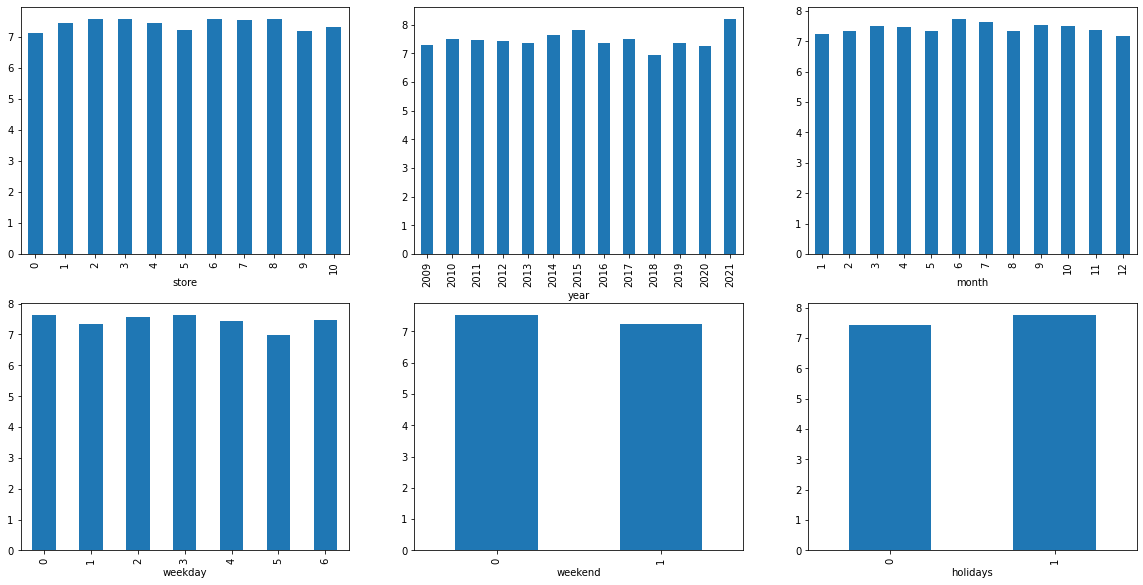

In [ ]:
features = ['store', 'year', 'month',\
			'weekday', 'weekend', 'holidays']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['sales'].plot.bar()
plt.show()


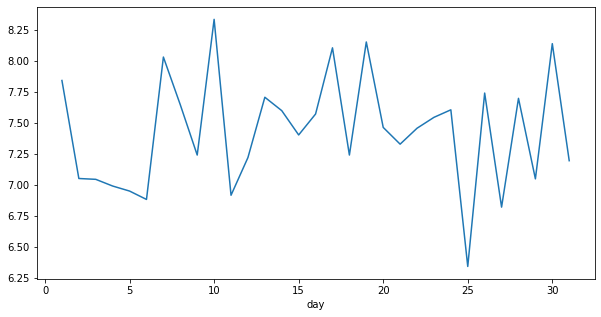

In [ ]:
plt.figure(figsize=(10,5))
df.groupby('day').mean()['sales'].plot()
plt.show()


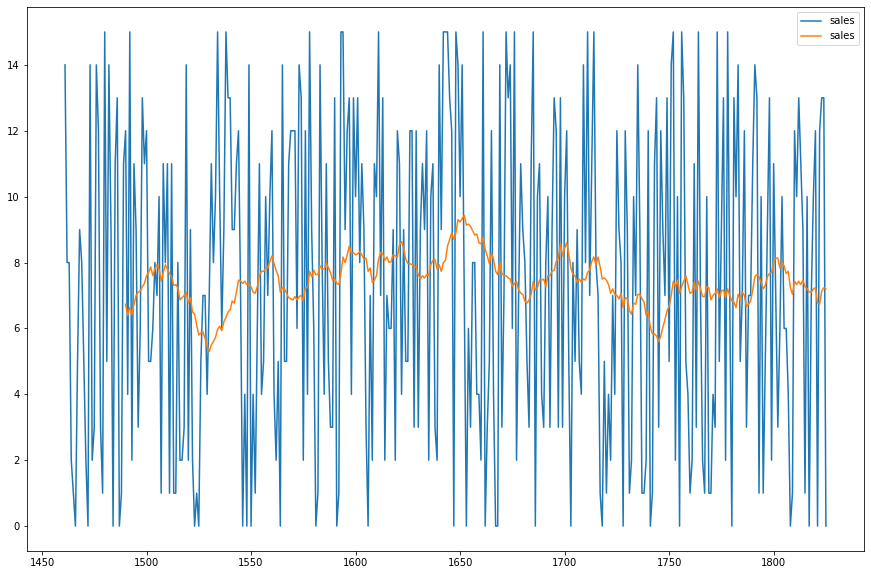

In [ ]:
plt.figure(figsize=(15, 10))
window_size = 30
data = df[df['year']==2013]
windows = data['sales'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['sales'].plot()
sma.plot()
plt.legend()
plt.show()


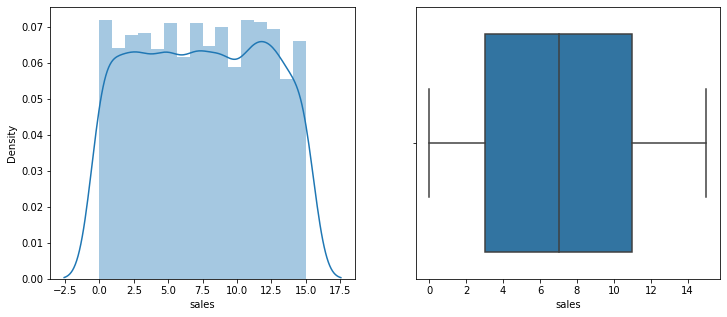

In [ ]:
plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(df['sales'])
  
plt.subplot(1, 2, 2)
sb.boxplot(df['sales'])
plt.show()

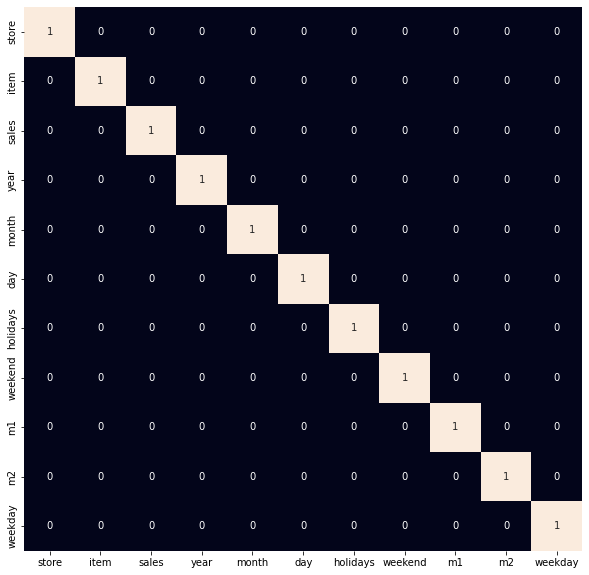

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()

In [ ]:
df = df[df['sales']<140]

In [ ]:
features = df.drop(['sales', 'year'], axis=1)
target = df['sales'].values


X_train, X_val, Y_train, Y_val = train_test_split(features, target,
												test_size = 0.05,
												random_state=22)
X_train.shape, X_val.shape


((4274, 9), (225, 9))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
models = [LinearRegression(), XGBRegressor(), Lasso(), Ridge()]

for i in range(4):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  3.9784415283376777
Validation Error :  4.053944734125829

[12:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor() : 
Training Error :  3.7971961485988133
Validation Error :  4.080923764970567

Lasso() : 
Training Error :  3.984524288397333
Validation Error :  4.070713877190246

Ridge() : 
Training Error :  3.978442217214064
Validation Error :  4.053948835174292

